In [ ]:
import tensorflow as tf                             
from matplotlib import pyplot as plt                        
import numpy as np

In [ ]:
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


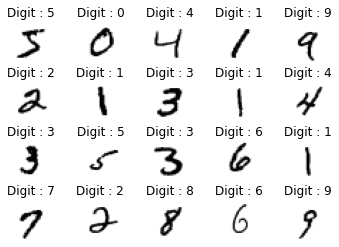

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [ ]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [ ]:
print('How image looks like : ')
print(train_img[0])

How image looks like : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

Text(0.5, 0, 'Intensity')

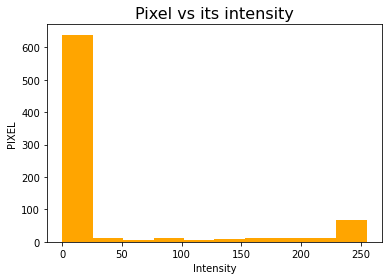

In [ ]:
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

In [ ]:
train_img=train_img/255.0
test_img=test_img/255.0

In [ ]:
print('How image looks like after normalising: ')
print(train_img[0])

How image looks like after normalising: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0. 

Text(0.5, 0, 'Intensity')

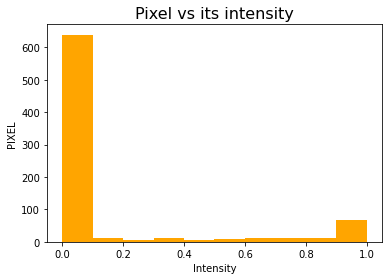

In [ ]:
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [ ]:
#compiling the sequential model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.fit(train_img,train_lab,epochs=100)

Epoch 1/100
60000/60000 [==============================] - 21s 357us/step - loss: 0.1826 - accuracy: 0.9446
Epoch 2/100
60000/60000 [==============================] - 21s 349us/step - loss: 0.0801 - accuracy: 0.9749
Epoch 3/100
60000/60000 [==============================] - 21s 347us/step - loss: 0.0548 - accuracy: 0.9831
Epoch 4/100
60000/60000 [==============================] - 21s 348us/step - loss: 0.0428 - accuracy: 0.9863
Epoch 5/100
60000/60000 [==============================] - 21s 346us/step - loss: 0.0337 - accuracy: 0.9893
Epoch 6/100
60000/60000 [==============================] - 21s 346us/step - loss: 0.0290 - accuracy: 0.9908
Epoch 7/100
60000/60000 [==============================] - 20s 341us/step - loss: 0.0244 - accuracy: 0.9922
Epoch 8/100
60000/60000 [==============================] - 20s 341us/step - loss: 0.0226 - accuracy: 0.9932
Epoch 9/100
60000/60000 [==============================] - 21s 348us/step - loss: 0.0205 - accuracy: 0.9937
Epoch 10/100
60000/60000 [==

In [ ]:
model.save('project.h5')

In [ ]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

Test Loss 0.582893428286937
Test Accuracy 0.9835000038146973


Predicted Value:  7
Successful prediction


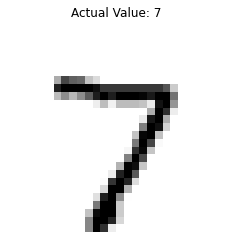

In [ ]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  2
Successful prediction


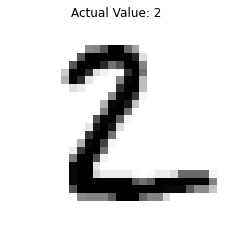

In [ ]:
plt.imshow(test_img[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[1]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(test_lab[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  1
Successful prediction


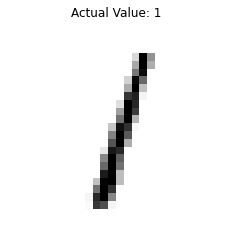

In [ ]:
plt.imshow(test_img[2],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[2]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[2]))
if(test_lab[2]==(np.argmax(prediction[2]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 5img.jpeg to 5img.jpeg


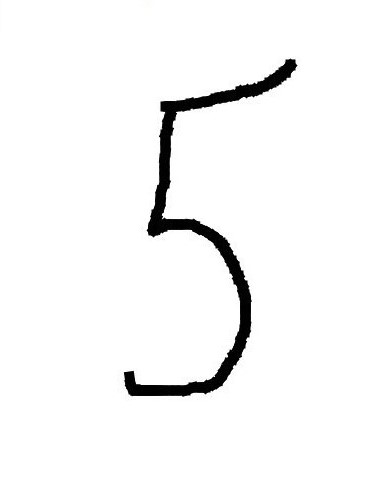

In [ ]:
from IPython.display import Image
Image('5img.jpeg',width=250,height=250)

In [ ]:
img = load_image('5img.jpeg')
digit=new_model.predict(img)
print('Predicted value : ',np.argmax(digit))

Predicted value :  5




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 4.jpg to 4.jpg


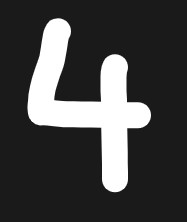

In [ ]:
from IPython.display import Image
Image('4.jpg')

In [ ]:
img = load_image('4.jpg')
digit=model.predict(img)
print(np.argmax(digit))

4


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving project1.h5 to project1.h5


In [ ]:
model=tf.keras.models.load_model('project1.h5')       # I have renamed the file as project1 in my PC